# 10-monkeys-cnn

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 读取数据

In [2]:
train_dir = r'C:/Users/Administrator/Desktop/data/archive/training/training/'
valid_dir = r'C:/Users/Administrator/Desktop/data/archive/validation/validation/'
label_file = r'C:/Users/Administrator/Desktop/data/archive/monkey_labels.txt'

In [4]:
labels = pd.read_csv(label_file, header=0)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


## 图片数据生成器

In [5]:
# 图片数据生成器
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

height = 128
width = 128
channels = 3
batch_size = 32
num_classes = 10

train_generator = train_datagen.flow_from_directory(train_dir,
                                 target_size = (height, width),
                                 batch_size = batch_size,
                                 shuffle = True,
                                 seed = 7,
                                 class_mode = 'categorical')

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1. / 255
)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                 target_size = (height, width),
                                 batch_size = batch_size,
                                 shuffle = True,
                                 seed = 7,
                                 class_mode = 'categorical')
print(train_generator.samples)
print(valid_generator.samples)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098
272


In [6]:
train_num = train_generator.samples
valid_num = valid_generator.samples

In [7]:
train_num

1098

In [8]:
x, y = train_generator.next()
print(x.shape, y.shape)
print(y)

(32, 128, 128, 3) (32, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

## 构建模型

In [9]:
model = keras.models.Sequential()
# 卷积
model.add(keras.layers.Conv2D(filters = 32, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu',
                              # batch_size, height, width, channels
                              input_shape=(128, 128, 3))) 

model.add(keras.layers.Conv2D(filters = 32, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu'))
# 池化
model.add(keras.layers.MaxPool2D()) #

model.add(keras.layers.Conv2D(filters = 64, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters = 64, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu'))
# 池化
model.add(keras.layers.MaxPool2D()) 
model.add(keras.layers.Conv2D(filters = 128, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters = 128, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu')) 
# 池化, 向下取整
model.add(keras.layers.MaxPooling2D()) 

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [11]:
history = model.fit(train_generator, 
                    steps_per_epoch = train_num // batch_size,
                    epochs = 10,
                    validation_data = valid_generator,
                    validation_steps = valid_num // batch_size)

Epoch 1/10
34/34 [==============================] - 47s 1s/step - loss: 2.3002 - accuracy: 0.1210 - val_loss: 2.2673 - val_accuracy: 0.1367
Epoch 2/10
34/34 [==============================] - 47s 1s/step - loss: 2.1532 - accuracy: 0.1998 - val_loss: 2.0190 - val_accuracy: 0.2188
Epoch 3/10
34/34 [==============================] - 47s 1s/step - loss: 2.0284 - accuracy: 0.2533 - val_loss: 2.1430 - val_accuracy: 0.2227
Epoch 4/10
34/34 [==============================] - 48s 1s/step - loss: 2.0463 - accuracy: 0.2533 - val_loss: 1.9074 - val_accuracy: 0.2695
Epoch 5/10
34/34 [==============================] - 53s 2s/step - loss: 1.9391 - accuracy: 0.2824 - val_loss: 1.8501 - val_accuracy: 0.3086
Epoch 6/10
34/34 [==============================] - 53s 2s/step - loss: 1.8329 - accuracy: 0.3236 - val_loss: 1.8284 - val_accuracy: 0.2891
Epoch 7/10
34/34 [==============================] - 53s 2s/step - loss: 1.7380 - accuracy: 0.3621 - val_loss: 1.6997 - val_accuracy: 0.3555
Epoch 8/10
34/34 [==

In [12]:
model.evaluate(valid_generator)

9/9 [==============================] - 6s 695ms/step - loss: 1.7411 - accuracy: 0.3566


[1.7410633563995361, 0.35661765933036804]

# 使用卷积操作图片

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [15]:
# 卷积操作
# 输入图片. input, 必须是4维tensor(图片数量, 图片高度, 图片的宽度, 图片的通道数)
# filters, 卷积核, 必须是4维的tensor(卷积核的高度和宽度, 输入图片的通道数, 卷积核的个数)
# strides, 步长, 卷积核在图片的各个维度上的移动步长, (1, 1, 1, 1)
# padding, 0填充, 'Valid'和'Same', valid表示不进行填充, same表示输入图片和输出图片大小保持一致.
# 输入数据的格式: data_format 'NHWC'
tf.nn.conv2d

<function tensorflow.python.ops.nn_ops.conv2d_v2(input, filters, strides, padding, data_format='NHWC', dilations=None, name=None)>

In [16]:
moon = plt.imread('./moonlanding.png')

In [17]:
moon.shape

(474, 630)

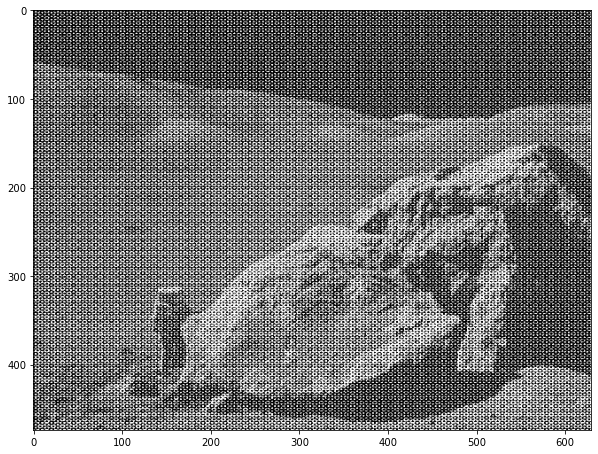

In [18]:
plt.figure(figsize=(10, 8))
plt.imshow(moon, cmap='gray')

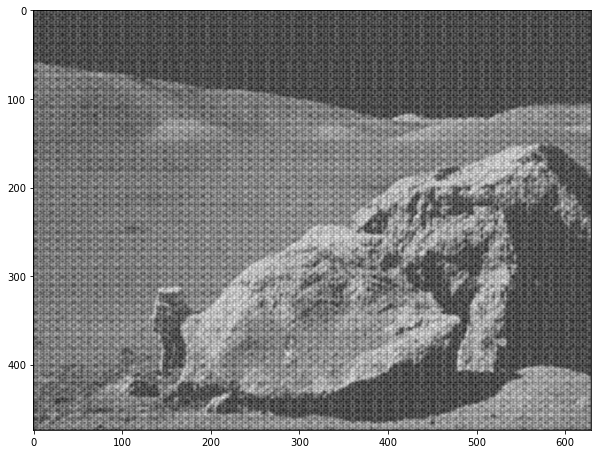

In [21]:
# 均值滤波
input_img = tf.constant(moon.reshape(1, 474, 630, 1), dtype=tf.float32)
filters = tf.constant(np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]).reshape(3, 3, 1, 1), dtype=tf.float32)
strides = [1, 1, 1, 1]
conv2d = tf.nn.conv2d(input=input_img, filters=filters, strides=strides, padding='SAME')
plt.figure(figsize=(10, 8))
plt.imshow(conv2d.numpy().reshape(474, 630), cmap='gray')

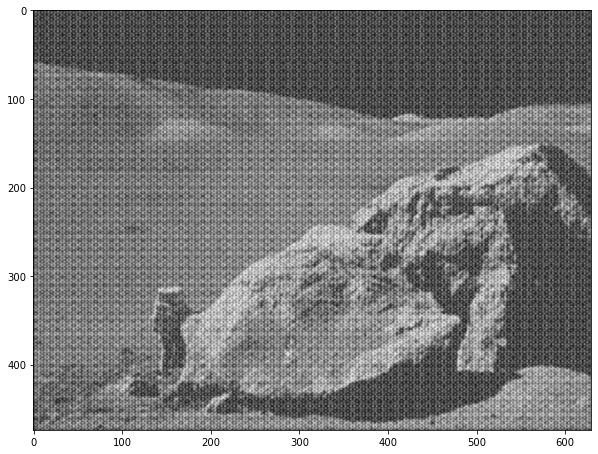

In [22]:
# 高斯滤波
input_img = tf.constant(moon.reshape(1, 474, 630, 1), dtype=tf.float32)
filters = tf.constant(np.array([[1/9, 2/9, 1/9], [2/9, 3/9, 2/9], [1/9, 2/9, 1/9]]).reshape(3, 3, 1, 1), dtype=tf.float32)
strides = [1, 1, 1, 1]
conv2d = tf.nn.conv2d(input=input_img, filters=filters, strides=strides, padding='SAME')
plt.figure(figsize=(10, 8))
plt.imshow(conv2d.numpy().reshape(474, 630), cmap='gray')

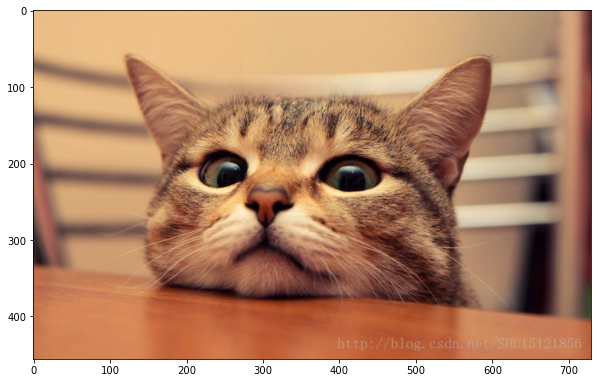

In [23]:
cat = plt.imread('cat.jpg')
plt.figure(figsize=(10, 8))
plt.imshow(cat)

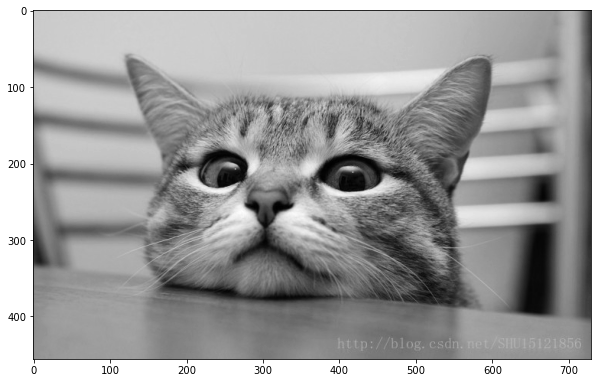

In [24]:
# 把猫变成黑白图片. 
cat = cat.mean(axis=2)
plt.figure(figsize=(10, 8))
plt.imshow(cat, cmap='gray')

In [25]:
cat.shape

(456, 730)

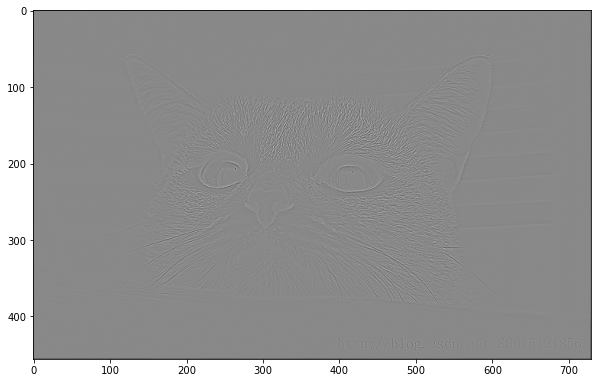

In [26]:
# 边缘检测
input_img = tf.constant(cat.reshape(1, 456, 730, 1), dtype=tf.float32)
filters = tf.constant(np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]).reshape(3, 3, 1, 1), dtype=tf.float32)
strides = [1, 1, 1, 1]
conv2d = tf.nn.conv2d(input=input_img, filters=filters, strides=strides, padding='SAME')
plt.figure(figsize=(10, 8))
plt.imshow(conv2d.numpy().reshape(456, 730), cmap='gray')

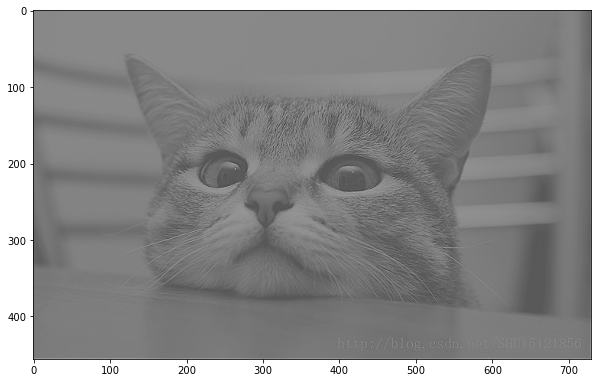

In [27]:
# 锐化
input_img = tf.constant(cat.reshape(1, 456, 730, 1), dtype=tf.float32)
filters = tf.constant(np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]).reshape(3, 3, 1, 1), dtype=tf.float32)
strides = [1, 1, 1, 1]
conv2d = tf.nn.conv2d(input=input_img, filters=filters, strides=strides, padding='SAME')
plt.figure(figsize=(10, 8))
plt.imshow(conv2d.numpy().reshape(456, 730), cmap='gray')

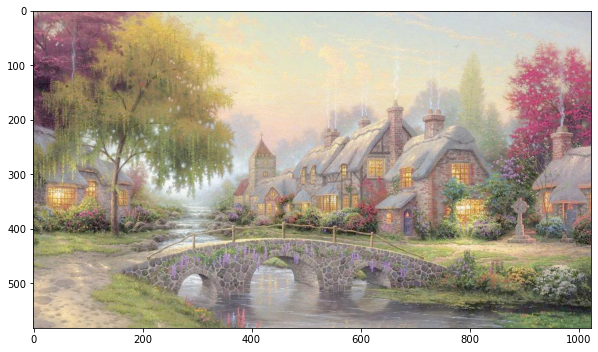

In [28]:
euro = plt.imread('./欧式.jpg')
plt.figure(figsize=(10, 8))
plt.imshow(euro)

In [29]:
euro.shape

(582, 1024, 3)

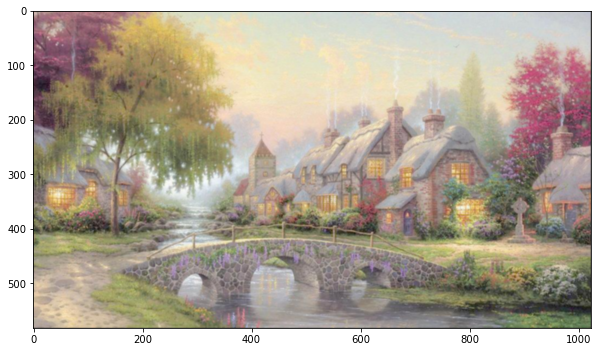

In [30]:
# 对彩色图片进行卷积操作.
# 把彩色图片的每个通道当成一张图
input_img = tf.constant(euro.reshape(1, 582, 1024, 3).transpose([3, 1, 2, 0]), dtype=tf.float32)
filters = tf.constant(np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]).reshape(3, 3, 1, 1), dtype=tf.float32)
strides = [1, 1, 1, 1]
conv2d = tf.nn.conv2d(input=input_img, filters=filters, strides=strides, padding='SAME')
plt.figure(figsize=(10, 8))
plt.imshow(conv2d.numpy().reshape(3, 582, 1024).transpose([1, 2, 0]) / 255.0)